# Experiments of DBSCAN Algorithm for Data Clustering

* Importing Necessary Libraries

In [1]:
import dbscan_lib
import pandas as pd
from dbscan_lib.evaluate_clusters import evaluate_clusters
from dbscan_lib.dbscan import DBSCAN
from dbscan_lib.heatmap import plot_heatmap
from dbscan_lib.plot_clusters import plot_clusters
from dbscan_lib.k_distance_plot import k_distance_plot

## Experiment 1: DBSCAN on Iris Dataset vs Scikit-Learn DBSCAN

This experiment is to compare the results of DBSCAN algorithm implemented from scratch with the results of DBSCAN algorithm from scikit-learn library to see if the results are similar.

In [2]:
# Load Iris dataset for experiment
iris = pd.read_csv('datasets/iris_dataset.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


* Get X and y from Iris Dataset

In [3]:
# Get X and y from dataset
X = iris.drop(['target','target_name'], axis=1,inplace=False)
y = iris['target']

* Normalize the X data to make it suitable for DBSCAN

In [4]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Experiment 1.1: MinPts = 5

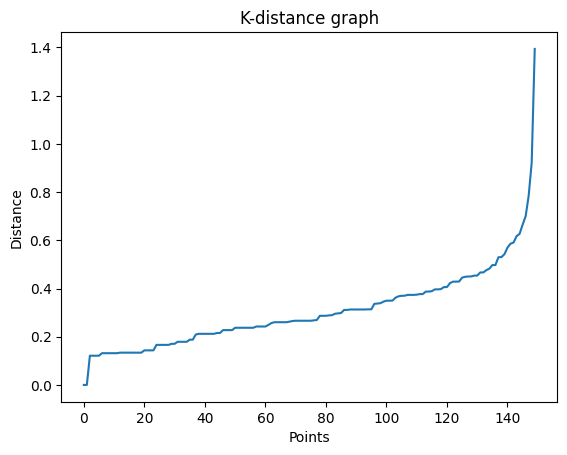

In [5]:
k_distance_plot(X, 5)

* Elbow point is around 0.6

* Cluster the data using DBSCAN and plot the clusters, heatmap and get silhouette score, davies bouldin score.

Silhouette score: 0.4027617471797909
Davies-Bouldin score: 7.046801925672976


<Figure size 640x480 with 0 Axes>

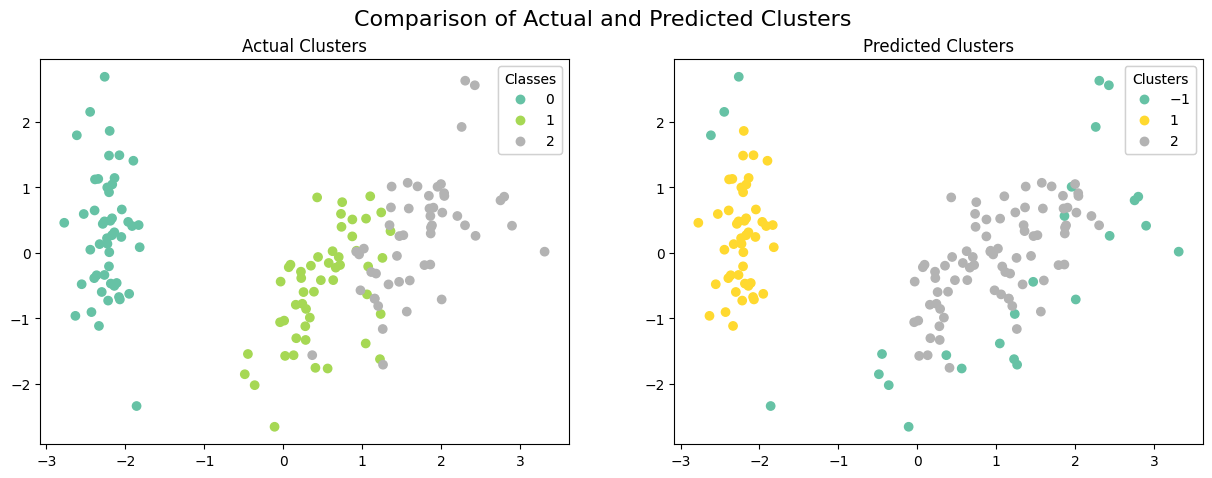

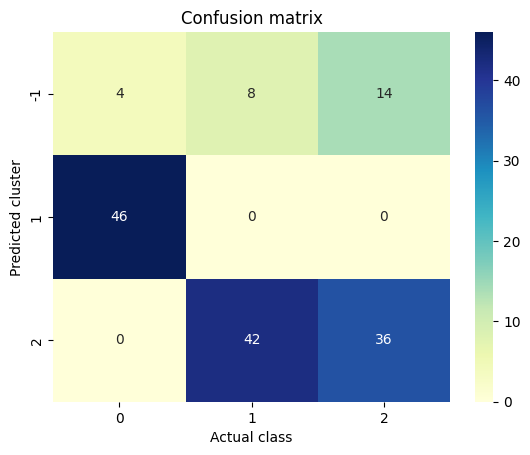

In [6]:
# Cluster Iris dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=0.6, min_pts=5)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

For eps = 0.6, there are unnecessarily too many outliers. So, we can try a higher value of eps, for example, 0.8.

Silhouette score: 0.5216965052515835
Davies-Bouldin score: 1.9432005358011477


<Figure size 640x480 with 0 Axes>

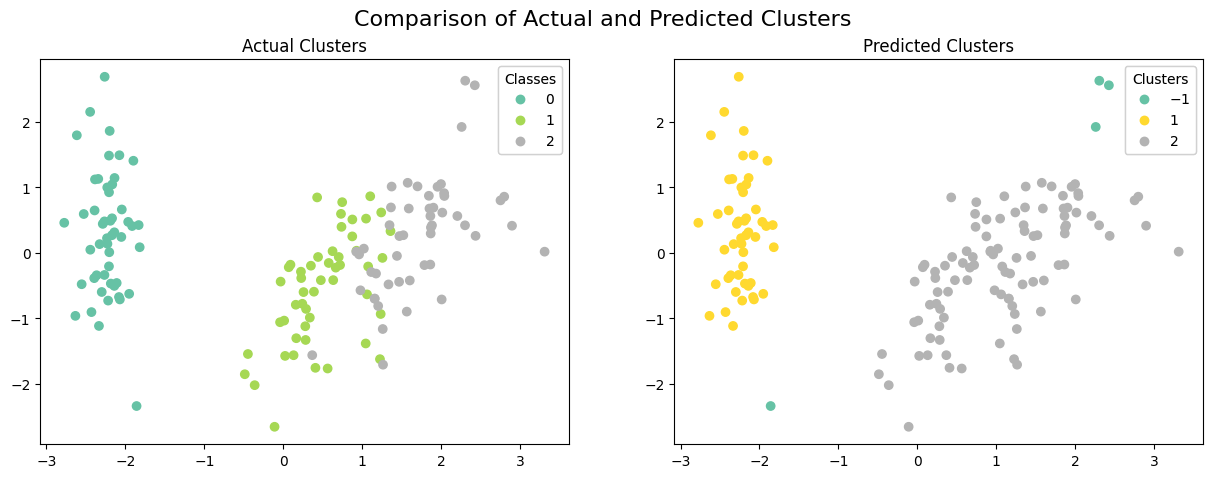

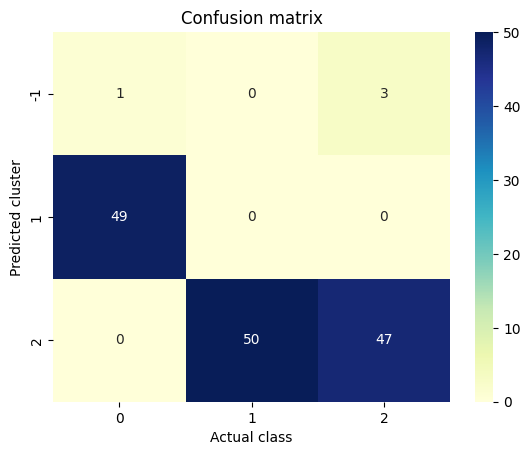

In [7]:
# Cluster Iris dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=0.8, min_pts=5)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

From the heatmap and scores, we can see that eps = 0.8 is a better choice than eps = 0.6.

Here we can see that the number of outliers has reduced and seems to be more reasonable. It still has issue of having 2 clusters but that is because of the nature of the data, two clusters are very close to each other and hence DBSCAN is not able to separate them.

Since DBSCAN seperates cluster based on density, it is not guaranteed that best clustering will have the same number of clusters as the number of classes in the data.

We can try to increase the minPts to 10 and see if it helps in gettting more clusters.

## Experiment 1.2: MinPts = 10

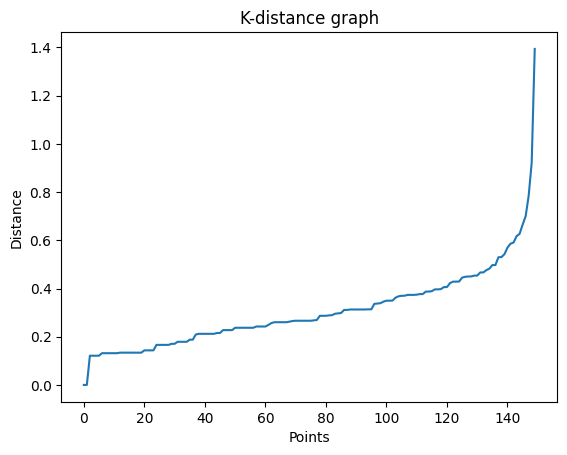

In [8]:
k_distance_plot(X, 10)

Silhouette score: 0.5108084808380122
Davies-Bouldin score: 3.1970977798153855


<Figure size 640x480 with 0 Axes>

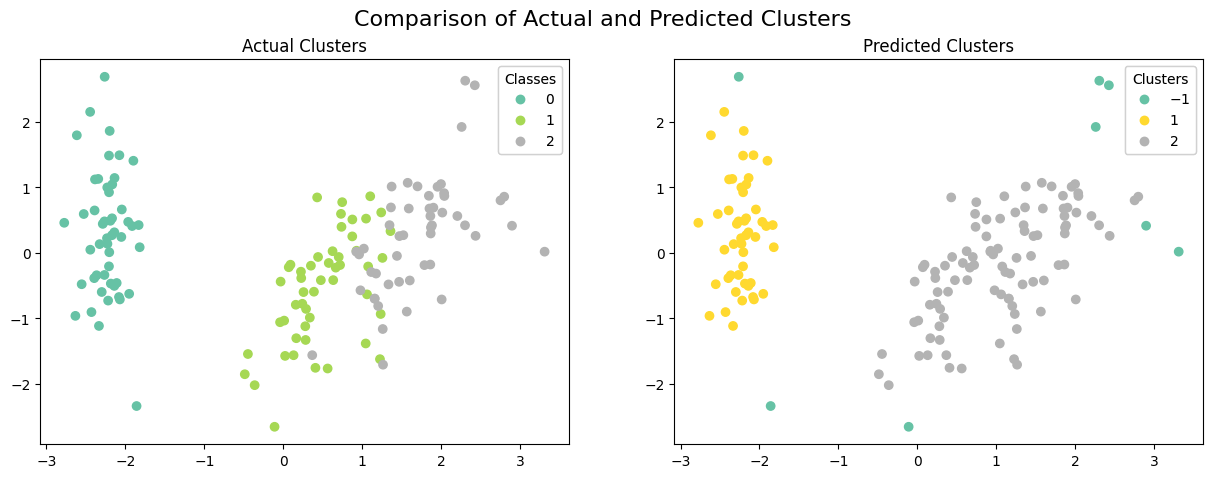

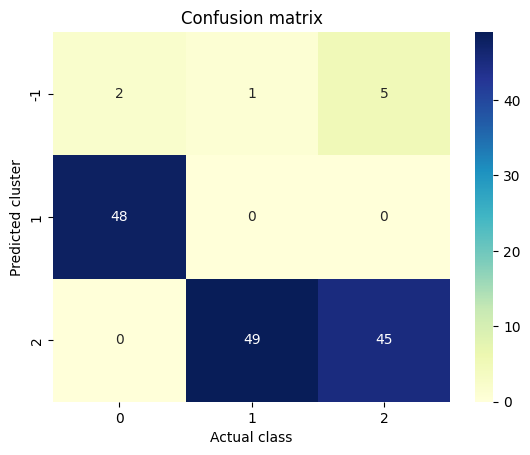

In [10]:
# Cluster Iris dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=0.8, min_pts=10)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

Changing minPts to 10 does not help in getting more clusters and the results are similar to minPts = 5 except that the number of outliers has increased and the silhouette score has decreased a bit. So, we can stick to minPts = 5.

Silhouette score: 0.5108084808380122
Davies-Bouldin score: 3.1970977798153855


<Figure size 640x480 with 0 Axes>

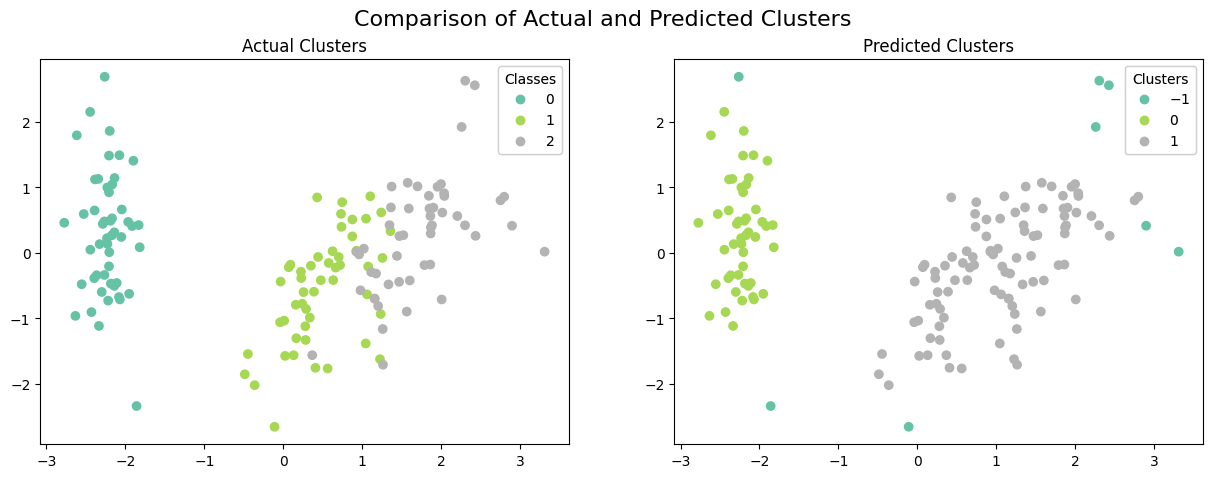

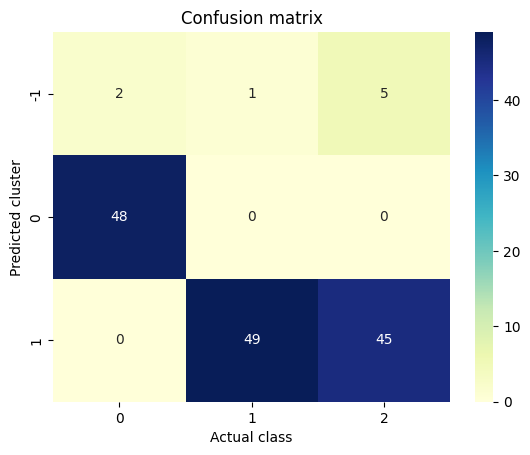

In [11]:
# Cluster Iris dataset using sklearn.cluster.DBSCAN
from sklearn.cluster import DBSCAN as sklearn_DBSCAN
sklearn_dbscan = sklearn_DBSCAN(eps=0.8, min_samples=10)
sklearn_clusters = sklearn_dbscan.fit_predict(X)
sklearn_clusters

# Evaluate clustering results
evaluate_clusters(X,y,sklearn_clusters)

* As we can see from the scores and plots, our implementation of DBSCAN is identical to the scikit-learn DBSCAN.

# Experiment 2: DBSCAN on Iris Dataset vs K-Means

## Clustering Iris Dataset using K-Means

c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.45994823920518646
Davies-Bouldin score: 0.8335949464754334


<Figure size 640x480 with 0 Axes>

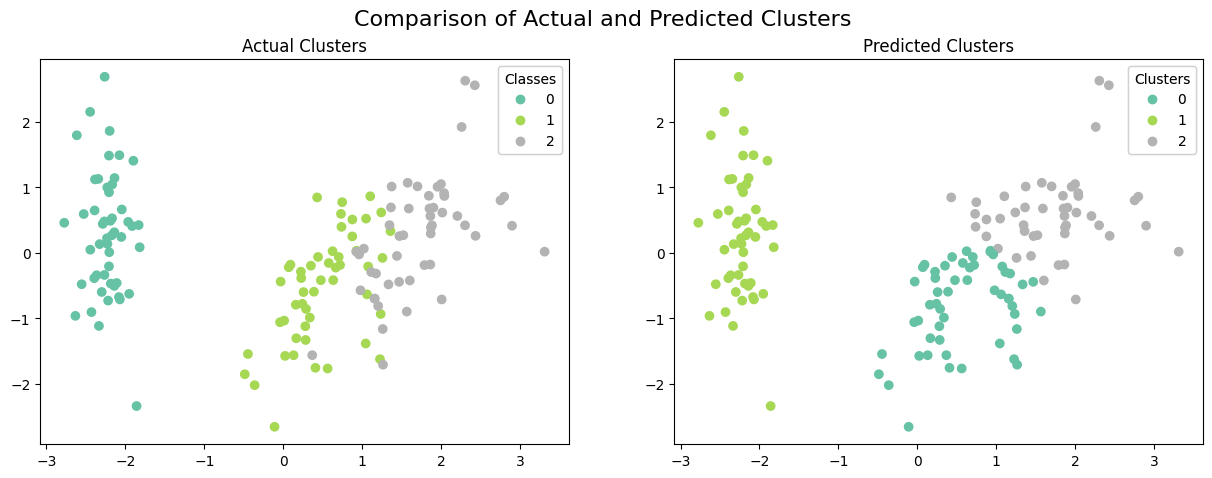

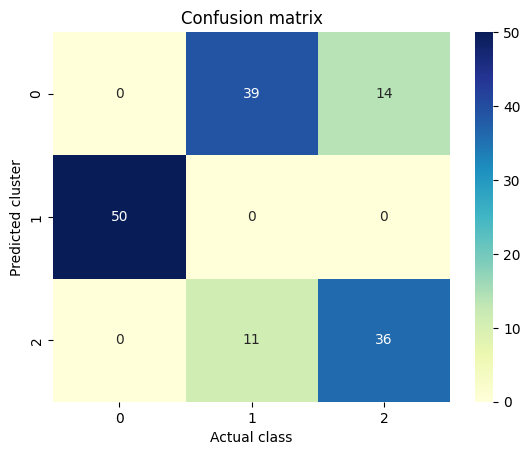

In [12]:
# Cluster Iris dataset using sklearn.cluster.KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

evaluate_clusters(X,y,kmeans_clusters)

* DBSCAN has a better score when it comes to silhouette but K-Means has a better score when it comes to davies bouldin score. This is because for K-Means intra-cluster distance is minimized which is not the case for DBSCAN, since DBSCAN also clusters outliers.
* We should also note that to use K-Means, we need to know the number of clusters beforehand which is not the case for DBSCAN.
* DBSCAN is also more robust to outliers than K-Means. From cluster plots, we can see that K-Means has done a better job than DBSCAN in clustering the iris data.

## Experiment 3: DBSCAN on Wine Dataset vs K-Means

* Import the dataset:

In [17]:
# import wine dataset
wine = pd.read_csv('datasets/wine_dataset.csv')
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [18]:
# Get X and y from dataset
X = wine.drop(['target','target_name'], axis=1,inplace=False)
y = wine['target']

In [19]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Experiment 3.1: MinPts = 10

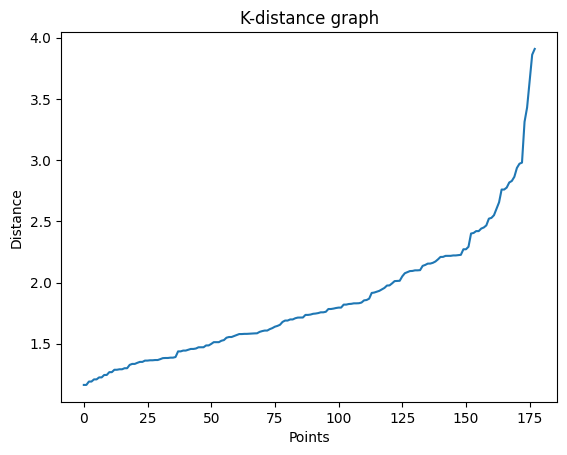

In [20]:
# K-distance plot
k_distance_plot(X, 10)

Elbow point is around 2.5 for eps.

Silhouette score: 0.20438854495188732
Davies-Bouldin score: 3.446127537043155


<Figure size 640x480 with 0 Axes>

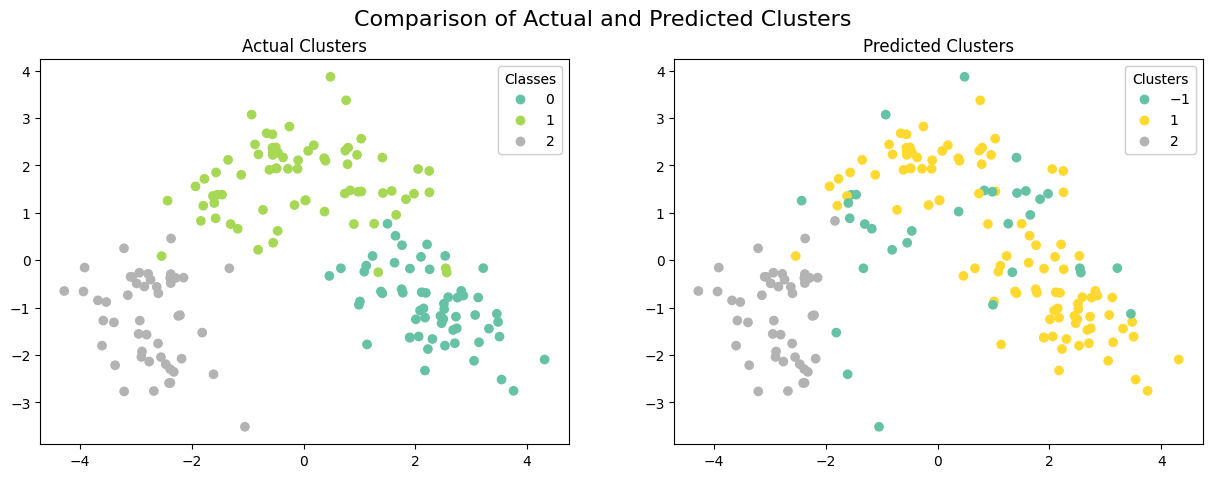

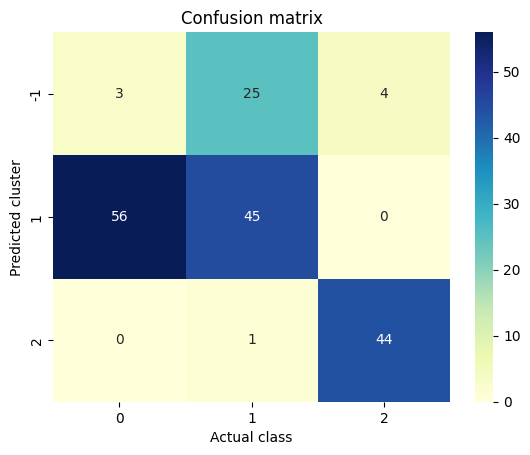

In [21]:
# Cluster wine dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.5, min_pts=10)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

There are too many outliers for eps = 2.5. So, we can try a higher value of eps, for example, 2.7.

Silhouette score: 0.14275197921473814
Davies-Bouldin score: 4.359465380537803


<Figure size 640x480 with 0 Axes>

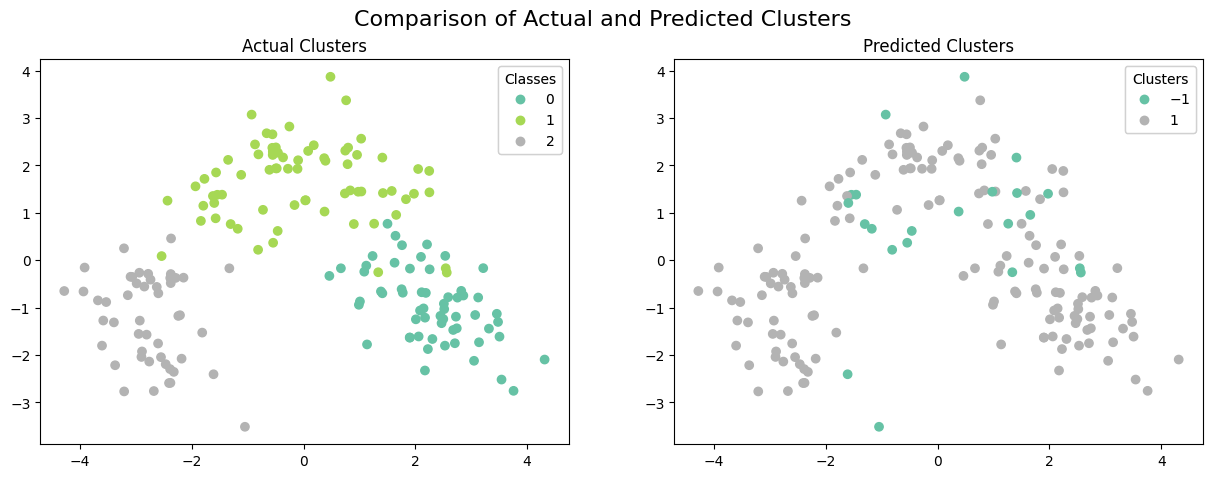

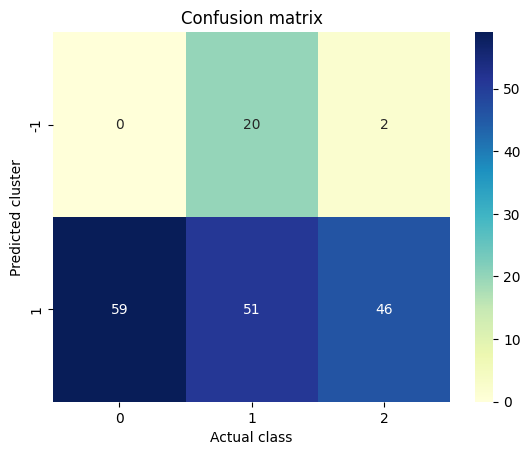

In [23]:
# Cluster wine dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.7, min_pts=10)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

There are less outliers but scores are getting worse and we have 1 cluster as a result. So, we can try a lower value of eps, for example, 2.3.

Silhouette score: 0.12092273309560064
Davies-Bouldin score: 2.875846453394958


<Figure size 640x480 with 0 Axes>

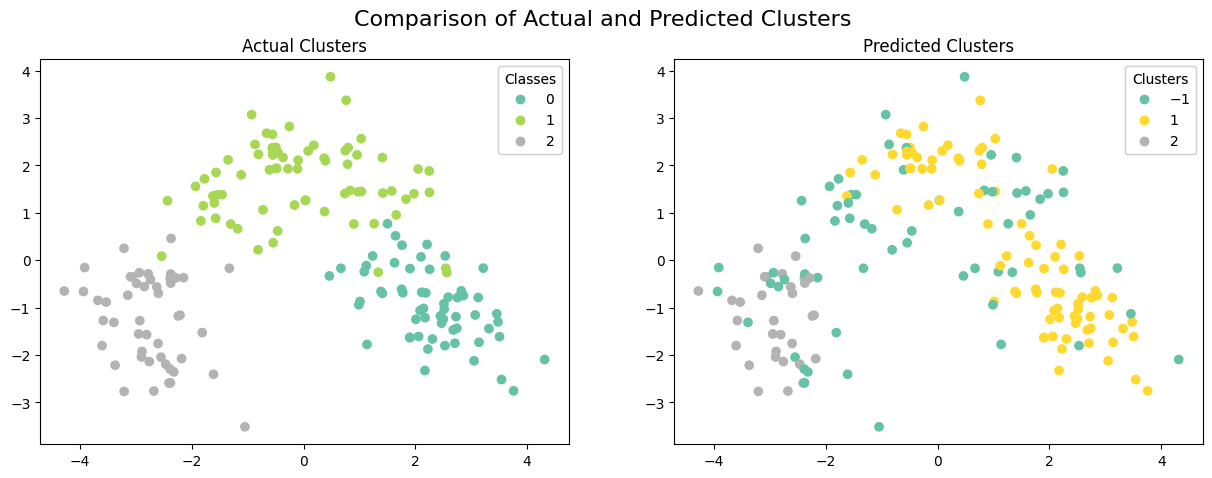

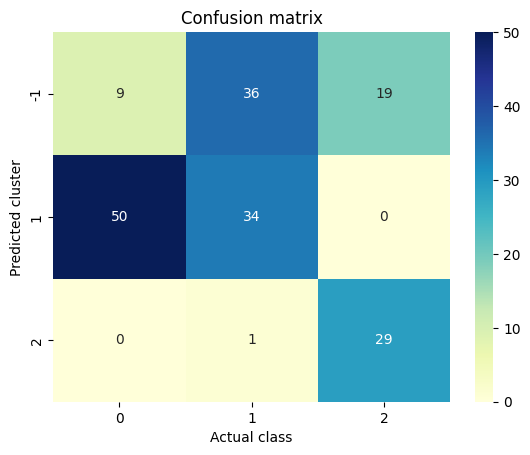

In [26]:
# Cluster wine dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.3, min_pts=10)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

Better than eps = 2.7 but we have the same issue of having too many outliers. It seems that eps = 2.5 is a better choice than eps = 2.3 and eps = 2.7 for minPts=10.

### Experiment 3.2: MinPts = 12

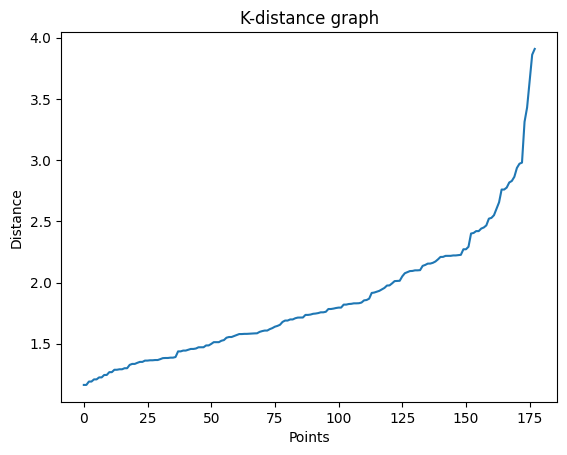

In [34]:
k_distance_plot(X, 12)

Silhouette score: 0.10622734553800696
Davies-Bouldin score: 2.4335128980292415


<Figure size 640x480 with 0 Axes>

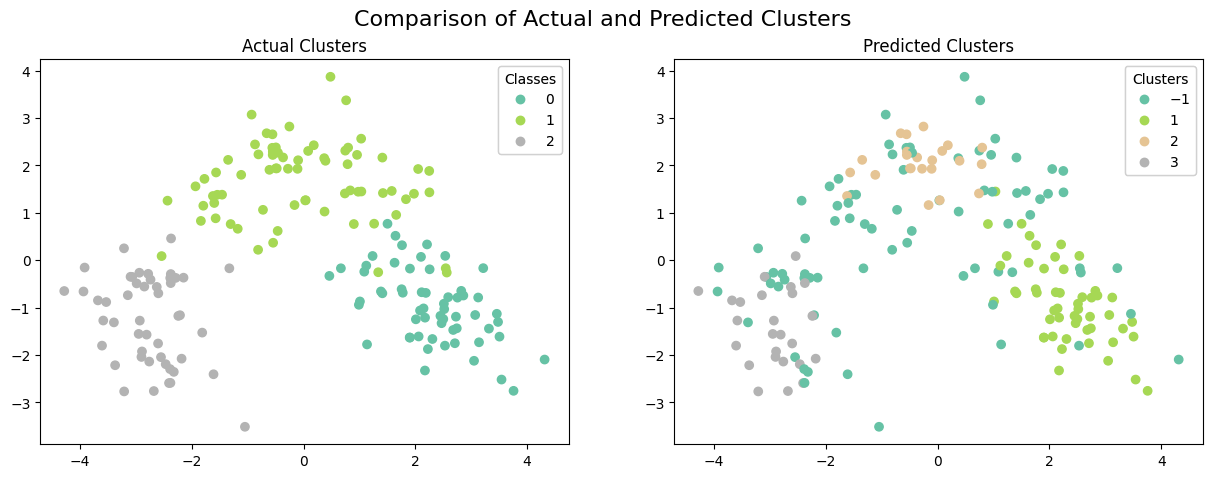

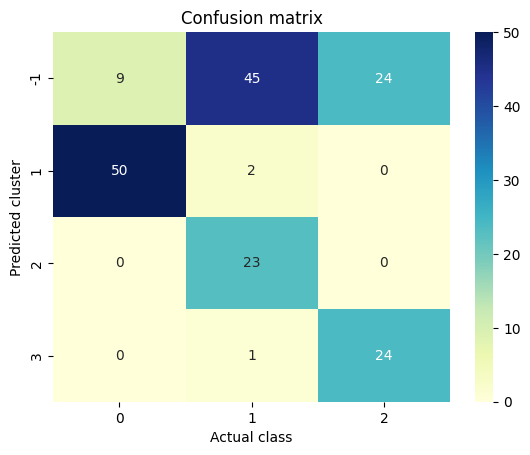

In [36]:
# Cluster wine dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.3, min_pts=12)
clusters = dbscan.fit(X)

# Evaluate clustering results
evaluate_clusters(X,y,clusters)

For minPts = 12, we can see that the clusters are more reasonable than minPts = 10. We have 3 clusters but there are more outliers than minPts = 10.

Silhouette score: 0.28594199657074876
Davies-Bouldin score: 1.391793832317738


c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

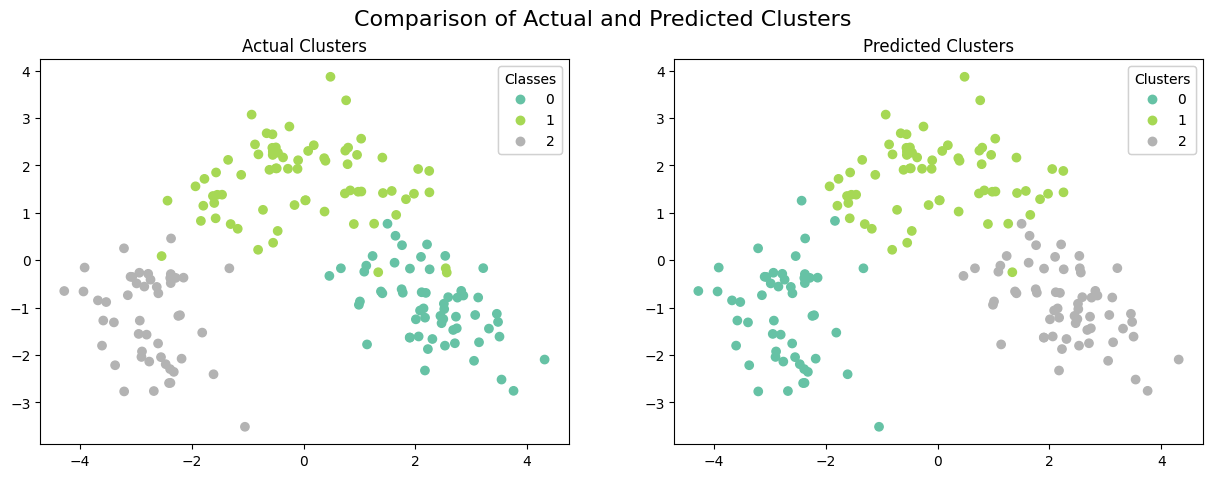

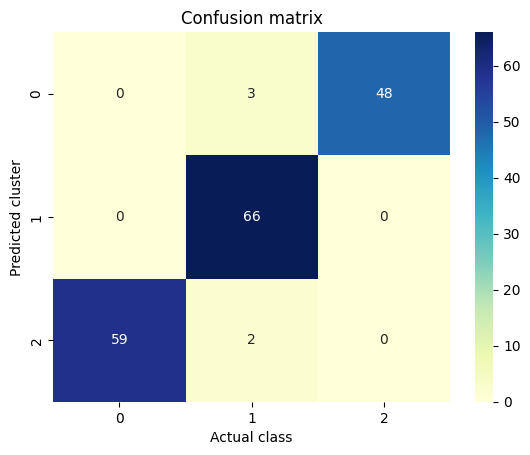

In [37]:
# Cluster wine dataset using sklearn.cluster.KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

evaluate_clusters(X,y,kmeans_clusters)

K-Means has done an excellent job in clustering the wine dataset. It has 3 clusters and according to the heatmap and plots very few data points are clustered mistakenly.

## DBSCAN on Glass Dataset vs K-Means

* Import the dataset:

In [38]:
# Get the glass dataset
glass = pd.read_csv('datasets/glass_dataset.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target_name,target
0,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,build_wind_float,0
1,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,build_wind_float,0
2,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,containers,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,build_wind_float,0
4,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,build_wind_non-float,1


In [39]:
# get X and y from dataset
X = glass.drop(['target','target_name'], axis=1,inplace=False)
y = glass['target']

In [40]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Experiment 4.1: MinPts = 5

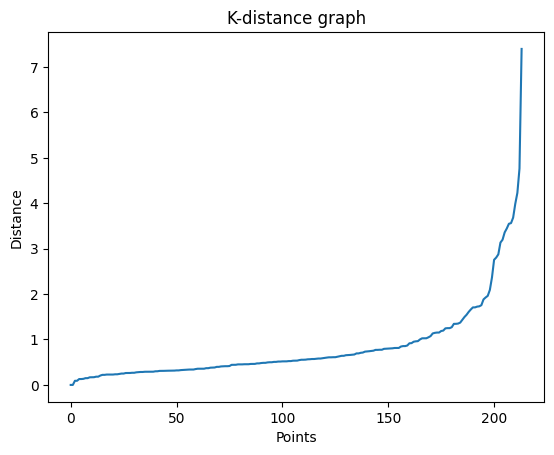

In [41]:
# K-distance plot
k_distance_plot(X, 5)

Silhouette score: 0.38247561828357857
Davies-Bouldin score: 1.9371871731151702


<Figure size 640x480 with 0 Axes>

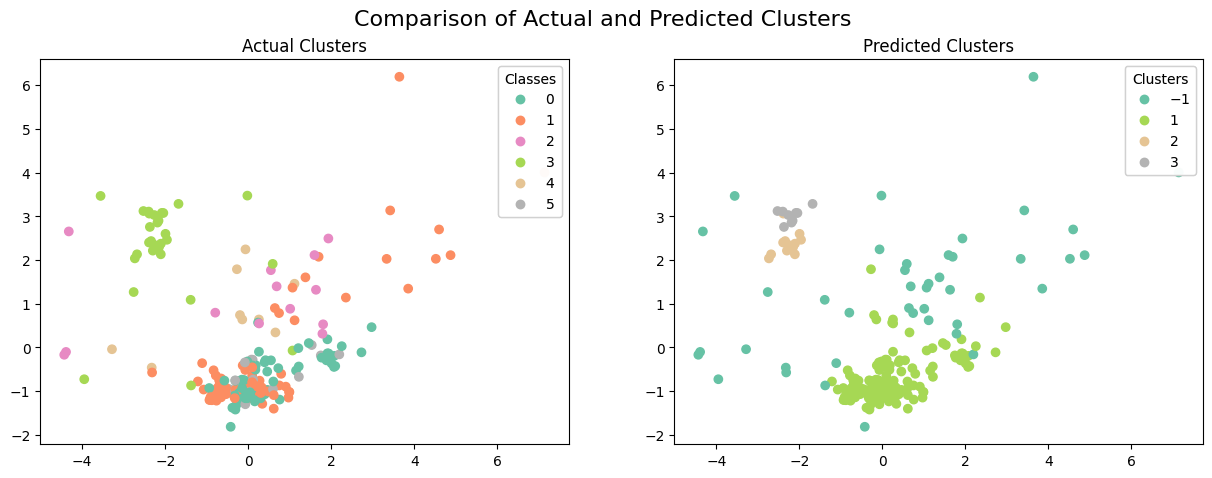

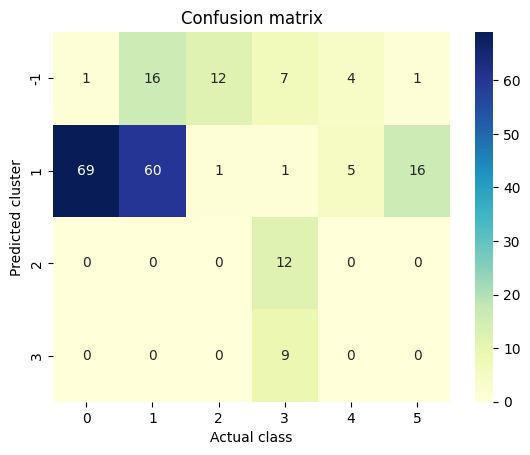

In [42]:
# Cluster glass dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=1.5, min_pts=5)
clusters = dbscan.fit(X)

evaluate_clusters(X,y,clusters)

We can clearly say this dataset is even harder to seperate than the other two datasets. DBSCAN was able to seperate the data into 3 clsuters and the predicted clusters seem far from real clusters and there are too many outliers. This is because the intra-cluster distance is too high in this dataset and there are lots of outliers.
Let's try different values of eps and minPts to see if we can get better results.

Silhouette score: 0.41240480242518684
Davies-Bouldin score: 2.4378792725287397


<Figure size 640x480 with 0 Axes>

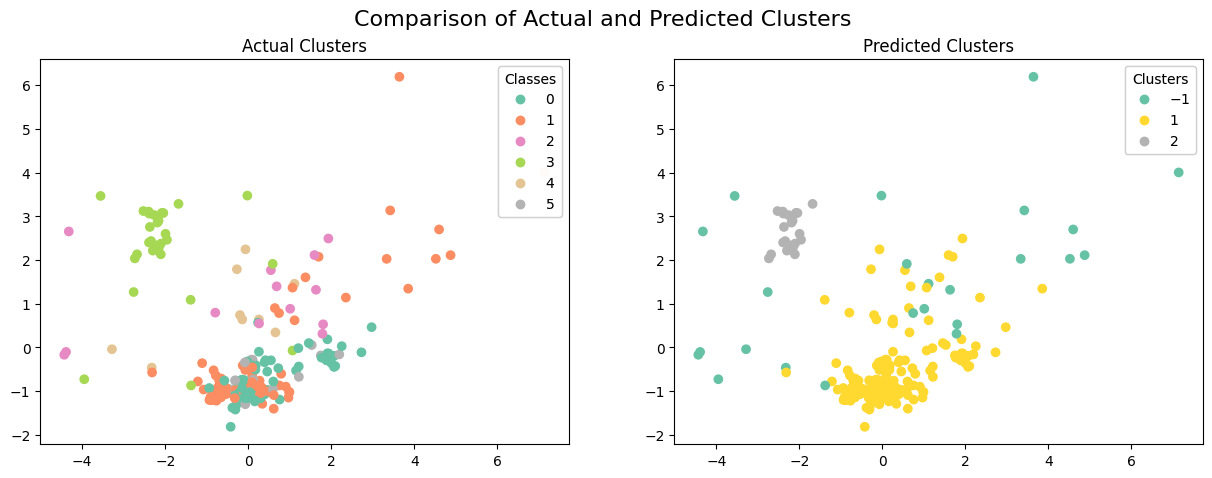

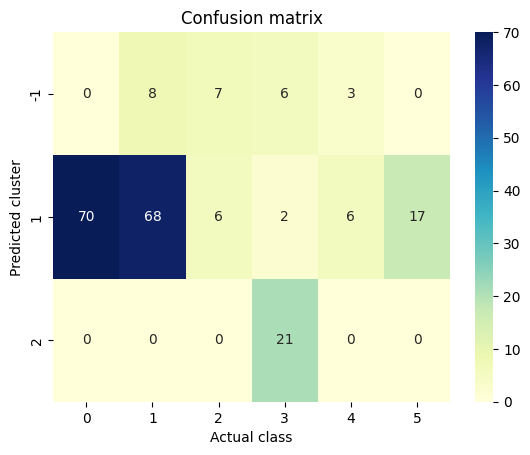

In [43]:
# Cluster glass dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.0, min_pts=5)
clusters = dbscan.fit(X)

evaluate_clusters(X,y,clusters)

Silhouette score: 0.3729046459820883
Davies-Bouldin score: 1.900897151351298


<Figure size 640x480 with 0 Axes>

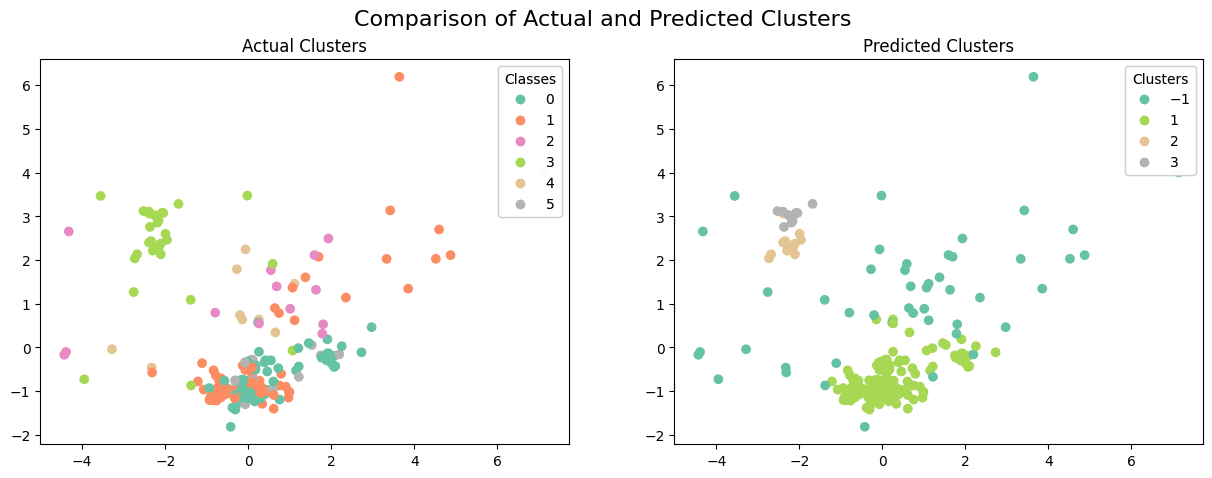

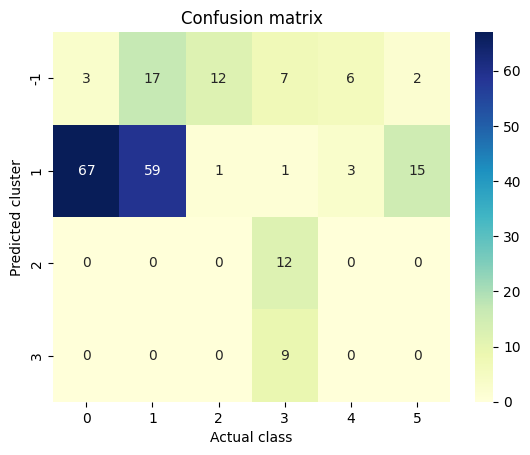

In [44]:
# Cluster glass dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=1.3, min_pts=5)
clusters = dbscan.fit(X)

evaluate_clusters(X,y,clusters)

Eps = 1.5 seems to be a better choice than eps = 1.3 and eps = 2.0. We have less outliers and the clusters seem reasonable.

### Experiment 4.2: MinPts = 10

Silhouette score: 0.40866088793153155
Davies-Bouldin score: 2.582037410078498


<Figure size 640x480 with 0 Axes>

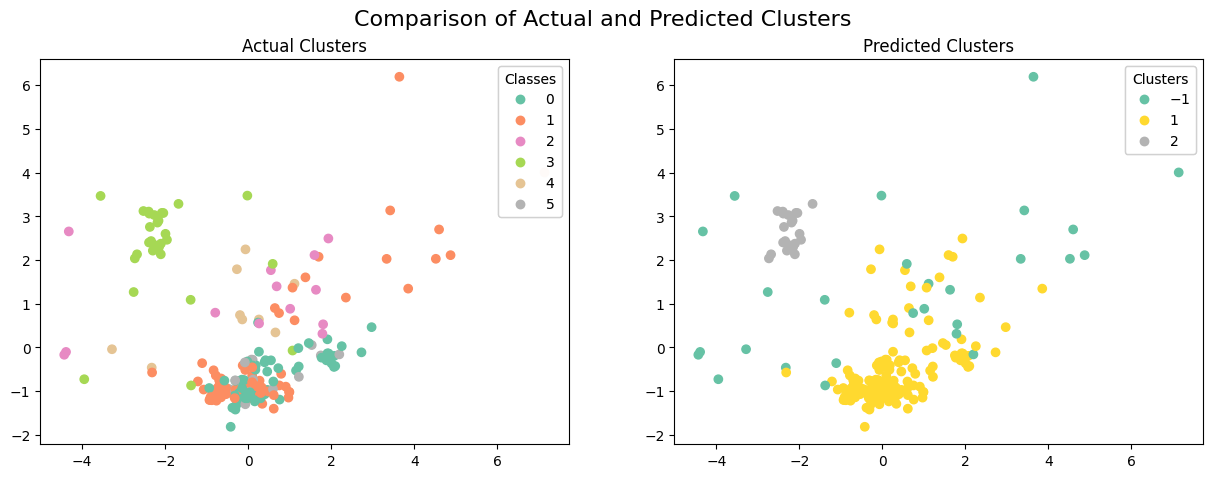

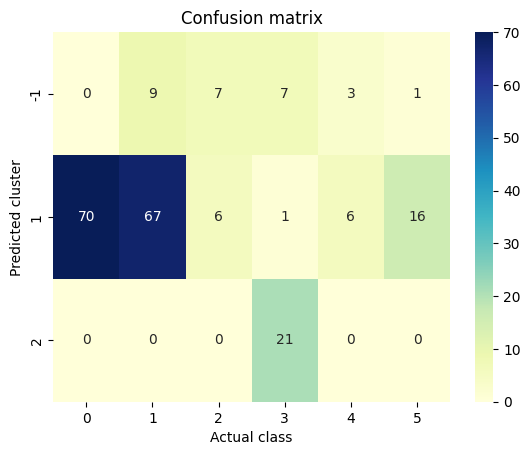

In [47]:
# Cluster glass dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=1.8, min_pts=3)
clusters = dbscan.fit(X)

evaluate_clusters(X,y,clusters)

This is a better result than minPts = 5. It is able to cluster two real clusters correctly and there are less outliers. It seems like DBSCAN is not the best choice for this dataset.

Silhouette score: 0.32626349113904424
Davies-Bouldin score: 0.95365965910836


c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

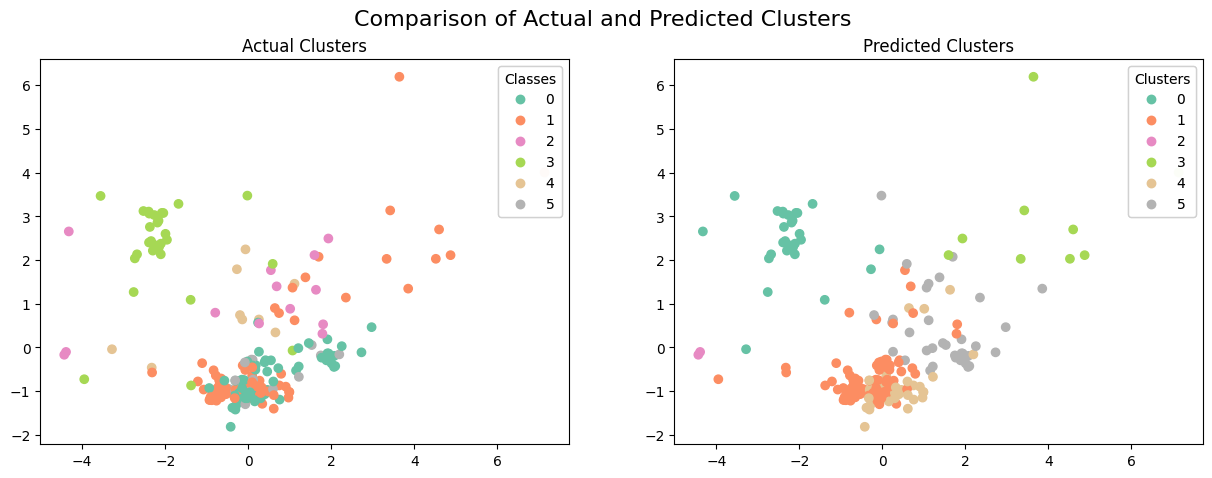

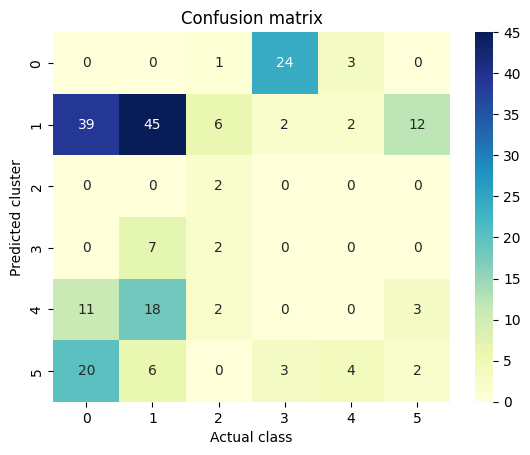

In [48]:
# Cluster glass dataset using sklearn.cluster.KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

evaluate_clusters(X,y,kmeans_clusters)

K-Means is not able to cluster the data correctly but it has done a better job than DBSCAN in clustering the glass dataset.At least some clusters are seperated correctly.

## CONCLUSION

* DBSCAN is a density based clustering algorithm which is more robust to outliers than K-Means. If we want to distinguish outliers from the data, DBSCAN is a better choice than K-Means.
* DBSCAN is not suitable for all datasets. It is suitable for datasets which have clusters with similar density and have low intra-cluster distance.
* If we have an idea about the number of clusters in the data, K-Means is a better choice than DBSCAN.
* DBSCAN is especially good for tasks where we don't know the number of clusters beforehand and we want to distinguish outliers from the data.